<p style="text-align: center;"><span style="font-family: comic sans ms,sans-serif;"><span style="font-size: xx-large;"><strong>Les Tours de Hanoi</strong></span></span></p>

In [1]:
from  sage.plot.plot3d.shapes import Cylinder as Cyl
from  sage.plot.plot3d.shapes import Box

class Hanoi(object):

    def __init__(self, ndisks=5, npegs=3):
        self._npegs = npegs
        self._ndisks = ndisks
        self._status = [0]*ndisks
        self._goal   = [1]*ndisks        
        self._nmoves = 0
        self._colors = [Color(c) for c in rainbow(ndisks)]

    def reset(self):
        self._status = [0]*self._ndisks
        self._nmoves = 0

    def peg_sorted(self):
        return tuple(tuple(i for i in range(self._ndisks)
                           if self._status[i]==p)
                     for p in range(self._npegs))

    def plot(self):
        def plot_rectangle(x_min, x_max, y_min, y_max, color = (0,0,0)):
            return polygon([(x_min, y_min), (x_min, y_max),
                            (x_max, y_max), (x_max, y_min)],
                           axes=False, color=color)

        res = plot_rectangle(0, 2*self._npegs*(1+self._ndisks), 0, -1)
        for i in range(self._npegs):
            axe  = (1+2*i)*(self._ndisks+1)
            res += plot_rectangle(axe-1/2, axe+1/2, 0, self._ndisks+1/2,
                                  color=(.5,.5,.5))
        pegs_sorted = self.peg_sorted()
        for p in range(self._npegs):
            for i, d in enumerate(pegs_sorted[p]):
                axe  = (1+2*p)*(self._ndisks+1)
                larg = 3/2 + (self._ndisks - d)/2
                res += plot_rectangle(axe-larg, axe+larg, i+0.1, i+1,
                                      color=self._colors[d])
        return res

    def plot3d(self):
        dim = self._npegs*(self._ndisks+1)
        res = Box(dim, dim/2, 1).translate(dim, 0,-1)
        for i in range(self._npegs):
            axe  = (1+2*i)*(self._ndisks+1)
            res += Cyl(1/2, self._ndisks+1/2, color=(.5,.5,.5)
                       ).translate(axe, 0, 0)
        pegs_sorted = self.peg_sorted()
        for p in range(self._npegs):
            for i, d in enumerate(pegs_sorted[p]):
                axe  = (1+2*p)*(self._ndisks+1)
                larg = 3/2 + (self._ndisks - d)/2
                res += Cyl(larg, 0.9, rgbcolor=self._colors[d]
                           ).translate(axe, 0, i+0.05)
        return res

    def moves(self):
        return ["%i to %i"%(i,j)
                for i in range(self._npegs)
                for j in range(self._npegs) if i != j]

    def move_disk(self, start, end, show=False):
        print("Move %i to %i (status = %s)"%(start, end, self._status))

        pegs_sorted = self.peg_sorted()
        if pegs_sorted[start] == ():
            raise ValueError("No Disk Here !")
        elif (pegs_sorted[end] != () and
              pegs_sorted[start][-1] <
              pegs_sorted[end][-1]):
            raise ValueError("Illegal move")
        else:
            self._nmoves +=1
            self._status[pegs_sorted[start][-1]] = end
        if show:
            self.plot().show()
    
    def win(self):
        return (self._status == self._goal)
            
    @lazy_attribute
    def graph(self):
        return graphs.HanoiTowerGraph(self._npegs, self._ndisks)
        
    def auto_solve(self):
        return self.graph.shortest_path(tuple(self._status), tuple(self._goal))
        
    def auto_move(self):
        sol = self.auto_solve()
        if len(sol) > 1:
            self._status = list(sol[1])
            self._nmoves +=1

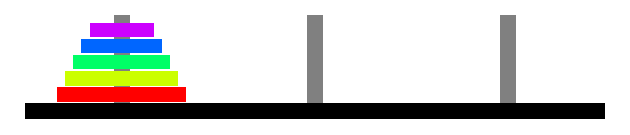

In [2]:
MyGame = Hanoi(5)
MyGame.plot().show()

In [3]:
MyGame._status

[0, 0, 0, 0, 0]

In [4]:
MyGame.move_disk(0, 2)

Move 0 to 2 (status = [0, 0, 0, 0, 0])


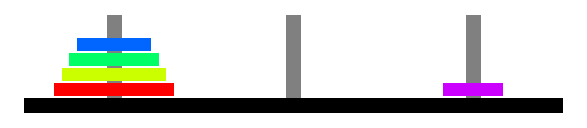

In [5]:
MyGame.plot().show()

In [6]:
MyGame.move_disk(1,2)

Move 1 to 2 (status = [0, 0, 0, 0, 2])


ValueError: No Disk Here !

In [7]:
MyGame.move_disk(0,1)

Move 0 to 1 (status = [0, 0, 0, 0, 2])


In [8]:
DefaultGame = Hanoi(3)
oldmove = "Init"
@interact
def play(move=selector([None] + DefaultGame.moves() + ["Auto", "Reset"],
                       buttons=True), View3d=False):    

    global oldmove  ## Hack to avoid double event
    if move == oldmove: return
    else: oldmove = move

    if move is "Reset":
        DefaultGame.reset()
    elif move is "Auto":
        DefaultGame.auto_move()
    elif move is not None:
        try:
            start = int(move[0])
            end   = int(move[5])
            DefaultGame.move_disk(start, end)
        except ValueError as message:
            print("Error (%i -> %i): %s"%(start, end, message))
    if DefaultGame.win(): 
        print("!!!!! YOU WIN !!!!!")
    print("Number of moves = %i"%(DefaultGame._nmoves))
    if View3d:
        DefaultGame.plot3d().show(figsize=7, aspect_ratio=1, axis=False, frame=False, viewer='jmol')
    else:
        DefaultGame.plot().show(figsize=7)

Interactive function <function play at 0x7f99b5d30bf8> with 2 widgets
  move: ToggleButtons(description='move'…

In [9]:
def move_tower(jeu, n, start, end, tmp):
    if n == 1:
        jeu.move_disk(start, end, True)
    else:
        move_tower(jeu, n-1, start, tmp, end)
        jeu.move_disk(start, end, True)
        move_tower(jeu, n-1, tmp, end, start)

Move 0 to 2 (status = [0, 0, 0, 0])


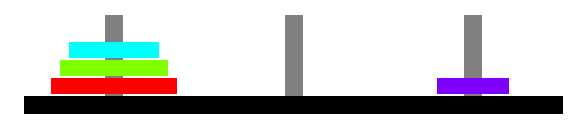

Move 0 to 1 (status = [0, 0, 0, 2])


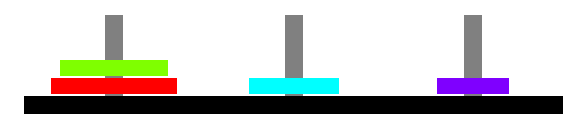

Move 2 to 1 (status = [0, 0, 1, 2])


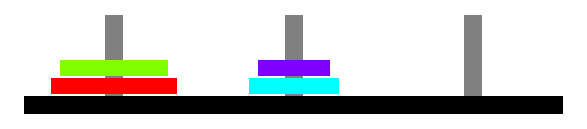

Move 0 to 2 (status = [0, 0, 1, 1])


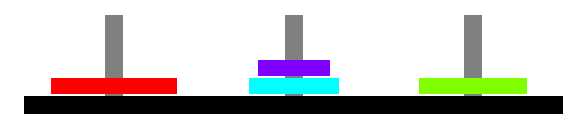

Move 1 to 0 (status = [0, 2, 1, 1])


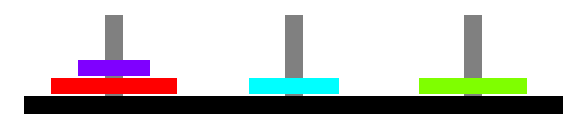

Move 1 to 2 (status = [0, 2, 1, 0])


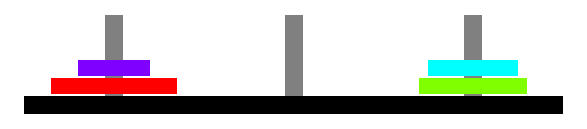

Move 0 to 2 (status = [0, 2, 2, 0])


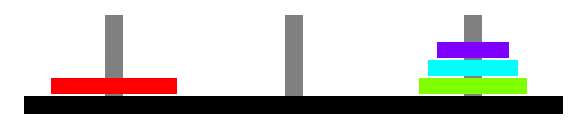

Move 0 to 1 (status = [0, 2, 2, 2])


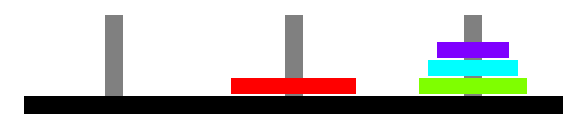

Move 2 to 1 (status = [1, 2, 2, 2])


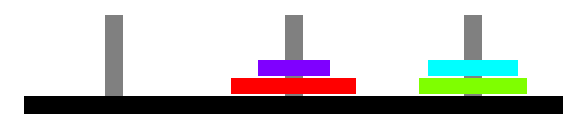

Move 2 to 0 (status = [1, 2, 2, 1])


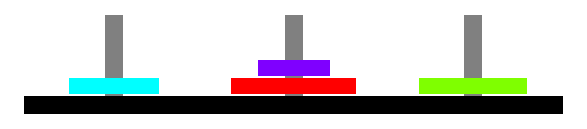

Move 1 to 0 (status = [1, 2, 0, 1])


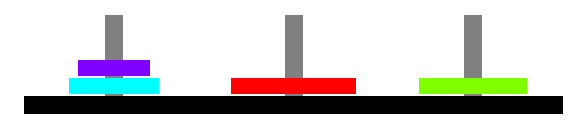

Move 2 to 1 (status = [1, 2, 0, 0])


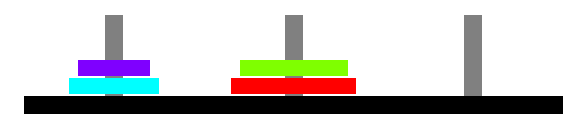

Move 0 to 2 (status = [1, 1, 0, 0])


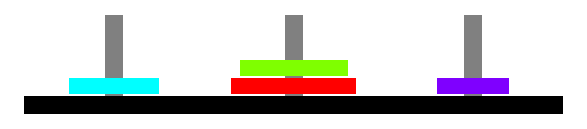

Move 0 to 1 (status = [1, 1, 0, 2])


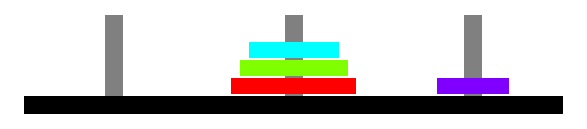

Move 2 to 1 (status = [1, 1, 1, 2])


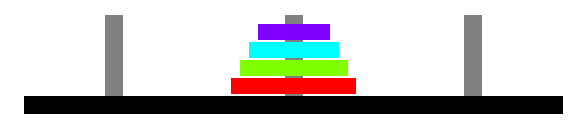

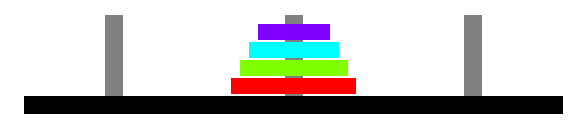

In [10]:
Jeu = Hanoi(4)
move_tower(Jeu, 4, 0, 1, 2)
Jeu.plot().show()

In [11]:
Jeu._nmoves

15

In [ ]:
def move_tower(game, start, end, tmp, n):
    if n == 1:
        game.move_disk(start, end, True)
    else:
        move_tower(game, start, tmp, end, n-1)
        game.move_disk(start, end, True)
        move_tower(game, tmp, end, start, n-1)    
MyGame = Hanoi(5)
move_tower(MyGame, 0, 1, 2, 5)

In [ ]:
def hanoi_solve_print(game, start, end, tmp, n):
    
    def indente(n): return "    "*(game._ndisks - n) 
    
    print("%s s=%s, e=%s, t=%s, n=%s"%(
          indente(n), start, end, tmp, n))
    if n == 1:
        print(indente(n), end="")
        game.move_disk(start, end, False)
    else:
        print("%s Appel recursif"%(indente(n)))
        hanoi_solve_print(game, start, tmp, end, n-1)
        print(indente(n), end="")
        game.move_disk(start, end, False)  
        print("%s Appel recursif"%(indente(n)))      
        hanoi_solve_print(game, tmp, end, start, n-1)

In [ ]:
game = Hanoi(4)
game.reset()
hanoi_solve_print(game, 0, 1, 2, 4)

In [12]:
float(2^64-1)/3600/24/365

584942417355.072

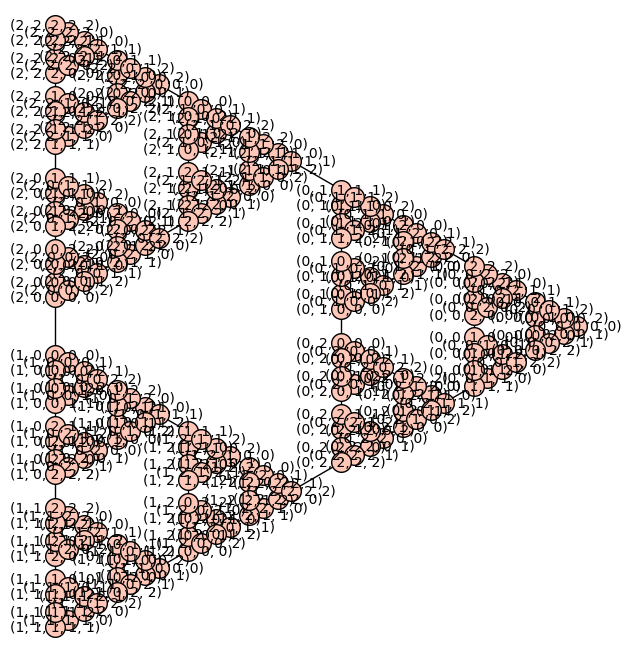

In [13]:
graphs.HanoiTowerGraph(3,5).show(figsize=10)